<a href="https://colab.research.google.com/github/Kayode50/Graded-Quiz--Regression-in-Machine-Learning/blob/main/STAGE_D__HAMOYE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import drive

In [84]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
!unzip '/content/drive/MyDrive/HAMOYE QUIZ/archive (1).zip'

Archive:  /content/drive/MyDrive/HAMOYE QUIZ/archive (1).zip
replace planet/planet/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# IMPORTING LIBRARIES

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
from collections import Counter
from tqdm import tqdm

In [88]:
import matplotlib.image as mpimg

In [89]:
import os
import gc
import tensorflow as tf

In [51]:
from tensorflow import keras 
from tensorflow.keras import backend
import tensorflow as tf

# LOADING DATA SET, FROM DIRECTORIES,CSV FILES

In [90]:
df = pd.read_csv('/content/drive/MyDrive/HAMOYE QUIZ/train_v2.csv/train_v2.csv'
                )
df.head(10)

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
5,train_5,haze primary water
6,train_6,agriculture clear cultivation primary water
7,train_7,haze primary
8,train_8,agriculture clear cultivation primary
9,train_9,agriculture clear cultivation primary road


In [91]:
#creating a tag list column
df['tag_list'] = df['tags'].apply(lambda x: x.split(' '))

In [92]:
df

,image_name,tags,tag_list
0,train_0,haze primary,"[haze, primary]"
1,train_1,agriculture clear primary water,"[agriculture, clear, primary, water]"
2,train_2,clear primary,"[clear, primary]"
3,train_3,clear primary,"[clear, primary]"
4,train_4,agriculture clear habitation primary road,"[agriculture, clear, habitation, primary, road]"
...,...,...,...
40474,train_40474,clear primary,"[clear, primary]"
40475,train_40475,cloudy,[cloudy]
40476,train_40476,agriculture clear primary,"[agriculture, clear, primary]"
40477,train_40477,agriculture clear primary road,"[agriculture, clear, primary, road]"


In [93]:
empty = []
for i in range(40479):
    empty.append(df['tag_list'][i])

In [94]:
empty

[['haze', 'primary'],
 ['agriculture', 'clear', 'primary', 'water'],
 ['clear', 'primary'],
 ['clear', 'primary'],
 ['agriculture', 'clear', 'habitation', 'primary', 'road'],
 ['haze', 'primary', 'water'],
 ['agriculture', 'clear', 'cultivation', 'primary', 'water'],
 ['haze', 'primary'],
 ['agriculture', 'clear', 'cultivation', 'primary'],
 ['agriculture', 'clear', 'cultivation', 'primary', 'road'],
 ['agriculture', 'clear', 'primary', 'slash_burn', 'water'],
 ['clear', 'primary', 'water'],
 ['cloudy'],
 ['clear', 'primary'],
 ['cloudy'],
 ['clear', 'primary'],
 ['clear', 'primary'],
 ['partly_cloudy', 'primary'],
 ['clear', 'primary'],
 ['agriculture', 'clear', 'primary', 'road'],
 ['agriculture', 'clear', 'primary', 'water'],
 ['clear', 'primary', 'road', 'water'],
 ['partly_cloudy', 'primary'],
 ['agriculture', 'clear', 'primary', 'road'],
 ['conventional_mine', 'partly_cloudy', 'primary'],
 ['clear', 'primary'],
 ['cloudy'],
 ['agriculture', 'partly_cloudy', 'primary', 'water'],
 

In [95]:
tags = [ x for i in empty for x in i]

In [96]:
labels = set(tags)
labels

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

In [97]:
os.getcwd()

'/content'

In [98]:
base_dir = '/content/planet/planet/'
train_path = os.path.join(base_dir,'train-jpg')

In [99]:
train_path

'/content/planet/planet/train-jpg'

In [100]:
train_name = os.listdir(train_path)
train_name

['train_37599.jpg',
 'train_12088.jpg',
 'train_21254.jpg',
 'train_30829.jpg',
 'train_32233.jpg',
 'train_33750.jpg',
 'train_37440.jpg',
 'train_30049.jpg',
 'train_22023.jpg',
 'train_19961.jpg',
 'train_8531.jpg',
 'train_3654.jpg',
 'train_37269.jpg',
 'train_12257.jpg',
 'train_12371.jpg',
 'train_11905.jpg',
 'train_6426.jpg',
 'train_27919.jpg',
 'train_21738.jpg',
 'train_5601.jpg',
 'train_37892.jpg',
 'train_10297.jpg',
 'train_23128.jpg',
 'train_19620.jpg',
 'train_7028.jpg',
 'train_22888.jpg',
 'train_30200.jpg',
 'train_36420.jpg',
 'train_22082.jpg',
 'train_14517.jpg',
 'train_36311.jpg',
 'train_6415.jpg',
 'train_29299.jpg',
 'train_36175.jpg',
 'train_36221.jpg',
 'train_16740.jpg',
 'train_24719.jpg',
 'train_17726.jpg',
 'train_8171.jpg',
 'train_17789.jpg',
 'train_13377.jpg',
 'train_28887.jpg',
 'train_764.jpg',
 'train_9208.jpg',
 'train_17751.jpg',
 'train_18482.jpg',
 'train_32662.jpg',
 'train_22765.jpg',
 'train_24825.jpg',
 'train_17300.jpg',
 'train_34

In [101]:
 gc.collect()

77

In [64]:
'''
x_train = []
for fname in tqdm(df['image_name'][:5000]):
    x_train.append(mpimg.imread((os.path.join(train_path,fname)+'.jpg')))
   
'''

"\nx_train = []\nfor fname in tqdm(df['image_name'][:5000]):\n    x_train.append(mpimg.imread((os.path.join(train_path,fname)+'.jpg')))\n   \n"

# EXPLORATORY DATA ANALYSIS

In [102]:
#create a tag dataframe depicting the number of occurence of the different tags 
tag_name = Counter(tags).keys()
frequency = Counter(tags).values()

In [103]:
df_tag = pd.DataFrame({'tag_name':tag_name,'frequency':frequency})
df_tag

,tag_name,frequency
0,haze,2697
1,primary,37513
2,agriculture,12315
3,clear,28431
4,water,7411
5,habitation,3660
6,road,8071
7,cultivation,4547
8,slash_burn,209
9,cloudy,2089


In [104]:
print('There are {} of labels for classification'.format(len(set(tags))))

There are 17 of labels for classification


<Axes: xlabel='frequency', ylabel='tag_name'>

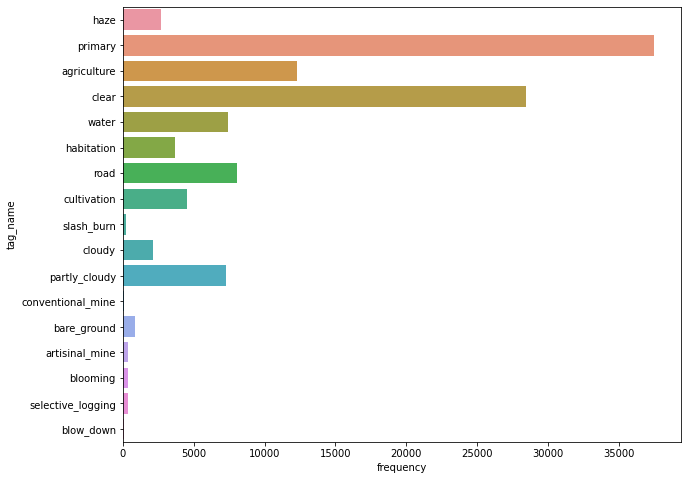

In [105]:
fig = plt.figure(figsize=(10,8))
sns.barplot(y='tag_name',x='frequency',data=df_tag)

# Pre-process the data

In [106]:
df = df.drop(columns = 'tag_list',axis =1)

In [107]:
df

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary
40477,train_40477,agriculture clear primary road


In [108]:
label_num  = {i:l for i,l in enumerate(set(tags))}
inv_label_num = {l:i for i,l in enumerate(set(tags))}

In [109]:
inv_label_num

{'haze': 0,
 'primary': 1,
 'blooming': 2,
 'partly_cloudy': 3,
 'cultivation': 4,
 'blow_down': 5,
 'artisinal_mine': 6,
 'agriculture': 7,
 'bare_ground': 8,
 'habitation': 9,
 'clear': 10,
 'cloudy': 11,
 'conventional_mine': 12,
 'selective_logging': 13,
 'water': 14,
 'slash_burn': 15,
 'road': 16}

In [110]:
batch_size = 50
def train_generator():
  while True:
    for start in range(0, len(df[:30000]), batch_size):
      x_batch = []
      y_batch = []
      end = min(start + batch_size, len(df[:30000]))
      df_train_batch = df[start:end]
      for f, tags in df_train_batch.values:
        img = mpimg.imread((os.path.join(train_path,f)+'.jpg'))

        targets = np.zeros(17)
        for t in tags.split(' '):
          targets[inv_label_num[t]] = 1
          x_batch.append(img)
          y_batch.append(targets)
      x_batch = np.array(x_batch, np.float32)/255
      y_batch = np.array(y_batch, np.uint8)
      yield x_batch, y_batch

In [111]:
batch_size = 50
def valid_generator():
  while True:
    for start in range(0, len(df[30000:]), batch_size):
      x_batch = []
      y_batch = []
      end = min(start + batch_size, len(df[30000:]))
      df_train_batch = df[start:end]
      for f, tags in df_train_batch.values:
        img = mpimg.imread((os.path.join(train_path,f)+'.jpg'))

        targets = np.zeros(17)
        for t in tags.split(' '):
          targets[inv_label_num[t]] = 1
          x_batch.append(img)
          y_batch.append(targets)
      x_batch = np.array(x_batch, np.float32)/255
      y_batch = np.array(y_batch, np.uint8)
      yield x_batch, y_batch

In [75]:
'''
y_train = []
label_enc =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in tqdm(empty):
    for x in i:
        label_enc[inv_label_num[x]] = 1
        
    y_train.append(label_enc)
    label_enc =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
  '''

'\ny_train = []\nlabel_enc =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]\nfor i in tqdm(empty):\n    for x in i:\n        label_enc[inv_label_num[x]] = 1\n        \n    y_train.append(label_enc)\n    label_enc =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]\n  '

In [76]:
#y_train = np.array(y_train)

In [77]:
#y_train

In [78]:
#check


# Cross-validation 

In [ ]:
x_val =x_train_array1[1500:]
x_train_array1 = x_train_array1[:1500]
y_val = y_train1[1500:]
y_train1 = y_train1[:1500]

# Establishing Evaluation Metrics function for the Model---- FBETA

In [112]:
def fbeta(y_true,y_pred,beta =2,epsilon = 1e-7):
    y_true = tf.cast(y_true,dtype=tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred,tf.float32),tf.constant(0.5)),tf.float32)
    
    tp = tf.reduce_sum(y_true*y_pred,axis=1)
    
    fp = tf.reduce_sum(y_pred,axis =1 )-tp
    
    fn = tf.reduce_sum(y_true,axis=1) - tp
    
    precision = tp / (tp + fp+epsilon)
    recall = tp / (tp + fn+epsilon)
    beta_squared = beta**2
    return (beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + epsilon)

# Neural Network Architecture
​

In [113]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [114]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding = 'same',input_shape=(256,256,4)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',padding = 'same'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',padding = 'same'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),activation='relu',padding = 'same'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(17,activation='sigmoid'))


model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 256, 256, 32)      1184      
                                                                 
 conv2d_25 (Conv2D)          (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 127, 127, 64)      18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 64)      36928     
                                                      

In [115]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[fbeta])

In [ ]:
history = model.fit_generator(train_generator(),steps_per_epoch=600,epochs =15,verbose =1,validation_data =valid_generator(),validation_steps = 200)

<ipython-input-116-33255332ccd9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator(),steps_per_epoch=600,epochs =15,verbose =1,validation_data =valid_generator(),validation_steps = 200)


Epoch 1/15
  3/600 [..............................] - ETA: 13:01:29 - loss: 0.6294 - fbeta: 0.4810

# PLOTTING THE LOSSES AND ACCURACY

In [ ]:
history.history

{'loss': [0.2630002498626709,
  0.22539451718330383,
  0.21287913620471954,
  0.20430848002433777,
  0.19554001092910767,
  0.18541480600833893,
  0.17027433216571808,
  0.15329165756702423],
 'fbeta': [0.6819018125534058,
  0.7221788167953491,
  0.7408568859100342,
  0.7523858547210693,
  0.7648182511329651,
  0.7800552248954773,
  0.798423171043396,
  0.8186395764350891],
 'val_loss': [0.2307192087173462,
  0.21415287256240845,
  0.20428000390529633,
  0.1939372420310974,
  0.19183216989040375,
  0.17626462876796722,
  0.16185888648033142,
  0.14577873051166534],
 'val_fbeta': [0.7339646816253662,
  0.7521284818649292,
  0.7502018809318542,
  0.760827898979187,
  0.7612271904945374,
  0.7857655882835388,
  0.8150282502174377,
  0.8276219964027405]}

Text(0.5, 1.0, 'Fbeta score plot')

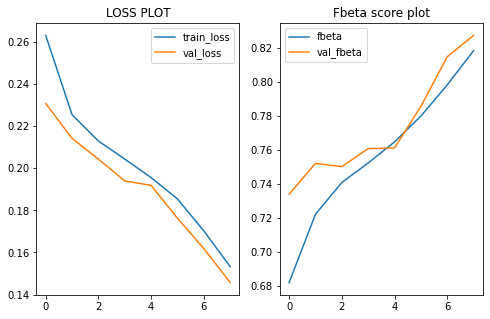

In [ ]:
#plotting the losses
fig =  plt.figure(figsize = (8,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss','val_loss'])
plt.title('LOSS PLOT')


plt.subplot(1,2,2)
plt.plot(history.history['fbeta'])
plt.plot(history.history['val_fbeta'])
plt.legend(['fbeta','val_fbeta'])
plt.title('Fbeta score plot')


# EVALUATING AND PREDICTING THE MODEL ON TEST DATA
​

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/HAMOYE QUIZ/sample_submission_v2.csv/sample_submission_v2.csv')
base_dir = '/content/planet/planet/'
test_path = os.path.join(base_dir,'test-jpg')
test_path

'/content/planet/planet/test-jpg'

In [ ]:
df_test1 = df_test.copy()

In [ ]:
#df_test = df_test[:40669]


In [ ]:
'''
x_train = []
for fname in tqdm(df['image_name'][:5000]):
    x_train.append(mpimg.imread((os.path.join(train_path,fname)+'.jpg')))
   
'''

In [ ]:
'''
batch_size = 1
def test_generator():
  while True:
    for start in range(0, len(df_test[:5]), batch_size):
      x_batch = []
      y_batch = []
      end = min(start + batch_size, len(df_test[:5]))
      df_test_batch = df_test[start:end]
      for f, tags in df_test_batch.values:
        img = mpimg.imread((os.path.join(test_path,f)+'.jpg'))
        x_batch.append(img)
        
      x_batch = np.array(x_batch, np.float32)/255
      yield x_batch
      '''

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def add_jpg(x):
  x=x+'.jpg'
  return x

In [ ]:

#df_test1= df_test1.drop('tags',axis=1)
df_test1['image_name'] = df_test1['image_name'].map(add_jpg)
df_test1

,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg
...,...
61186,file_9995.jpg
61187,file_9996.jpg
61188,file_9997.jpg
61189,file_9998.jpg


In [ ]:
test_image_gen = ImageDataGenerator(rescale = 1/255)

In [ ]:
test_generator = test_image_gen.flow_from_dataframe(dataframe=df_test1, 
                                                directory="/content/planet/planet/test-jpg", 
                                                x_col="image_name", 
                                                y_col=None, 
                                                batch_size=50, 
                                                shuffle=False, 
                                                class_mode=None,
                                                color_mode='rgba',
                                                target_size=(256,256))

Found 40669 validated image filenames.


/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:1137: UserWarning: Found 20522 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
test_generator.reset()
prediction = model.predict(test_generator, steps = 814, verbose = 1)

814/814 [==============================] - 174s 213ms/step


In [ ]:
prediction = np.round(prediction)

In [ ]:
file_names = test_generator.filenames

In [ ]:
file_names

['test_0.jpg',
 'test_1.jpg',
 'test_2.jpg',
 'test_3.jpg',
 'test_4.jpg',
 'test_5.jpg',
 'test_6.jpg',
 'test_7.jpg',
 'test_8.jpg',
 'test_9.jpg',
 'test_10.jpg',
 'test_11.jpg',
 'test_12.jpg',
 'test_13.jpg',
 'test_14.jpg',
 'test_15.jpg',
 'test_16.jpg',
 'test_17.jpg',
 'test_18.jpg',
 'test_19.jpg',
 'test_20.jpg',
 'test_21.jpg',
 'test_22.jpg',
 'test_23.jpg',
 'test_24.jpg',
 'test_25.jpg',
 'test_26.jpg',
 'test_27.jpg',
 'test_28.jpg',
 'test_29.jpg',
 'test_30.jpg',
 'test_31.jpg',
 'test_32.jpg',
 'test_33.jpg',
 'test_34.jpg',
 'test_35.jpg',
 'test_36.jpg',
 'test_37.jpg',
 'test_38.jpg',
 'test_39.jpg',
 'test_40.jpg',
 'test_41.jpg',
 'test_42.jpg',
 'test_43.jpg',
 'test_44.jpg',
 'test_45.jpg',
 'test_46.jpg',
 'test_47.jpg',
 'test_48.jpg',
 'test_49.jpg',
 'test_50.jpg',
 'test_51.jpg',
 'test_52.jpg',
 'test_53.jpg',
 'test_54.jpg',
 'test_55.jpg',
 'test_56.jpg',
 'test_57.jpg',
 'test_58.jpg',
 'test_59.jpg',
 'test_60.jpg',
 'test_61.jpg',
 'test_62.jpg',
 '

In [ ]:
#prediction = model.predict(test_generator(),verbose =1,batch_size=500)

   2164/Unknown - 4032s 2s/step

# Convert the encoded labels back to their original form

In [ ]:
def decode(x):
  s = ''
  for i in range(17):
    if x[i] ==1:
      s = s+' ' + label_num[i]
  return s

In [ ]:
inv_label_num.keys()

dict_keys(['primary', 'blooming', 'slash_burn', 'conventional_mine', 'bare_ground', 'partly_cloudy', 'habitation', 'haze', 'selective_logging', 'cultivation', 'cloudy', 'agriculture', 'clear', 'water', 'blow_down', 'artisinal_mine', 'road'])

In [ ]:
#prediction = [[1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0],[1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0]]

In [ ]:
df_prediction=pd.DataFrame(prediction,columns=inv_label_num.keys())
df_prediction['file_names'] = file_names

In [ ]:
df_prediction['labels'] = df_prediction.apply(decode,axis=1)

In [ ]:
df_prediction = df_prediction.drop(['primary',	'blooming',	'slash_burn',	'conventional_mine',	'bare_ground',	'partly_cloudy',	'habitation',	'haze',	'selective_logging',	'cultivation',	'cloudy',	'agriculture',	'clear',	'water',	'blow_down',	'artisinal_mine',	'road'],axis=1)

In [ ]:
df_prediction

,file_names,labels
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear
2,test_2.jpg,primary partly_cloudy
3,test_3.jpg,primary clear
4,test_4.jpg,primary partly_cloudy
...,...,...
40664,test_40664.jpg,primary clear
40665,test_40665.jpg,primary habitation agriculture clear water road
40666,test_40666.jpg,primary agriculture clear road
40667,test_40667.jpg,primary partly_cloudy


In [ ]:
#ADDITIONAL TEST IMAGE

In [ ]:
add_df_test1 =df_test1[40669:] 
add_df_test1

,image_name
40669,file_0.jpg
40670,file_1.jpg
40671,file_10.jpg
40672,file_100.jpg
40673,file_1000.jpg
...,...
61186,file_9995.jpg
61187,file_9996.jpg
61188,file_9997.jpg
61189,file_9998.jpg


In [ ]:
#reading additional datagenerator
add_test_generator = test_image_gen.flow_from_dataframe(dataframe = add_df_test1, 
                                                    directory ="/content/test-jpg-additional/test-jpg-additional", 
                                                    x_col="image_name", 
                                                    y_col=None, 
                                                    batch_size=50, 
                                                    shuffle=False, 
                                                    class_mode=None,
                                                    color_mode = 'rgba',
                                                    target_size=(256,256))

Found 20522 validated image filenames.


In [ ]:
add_test_generator.reset()
prediction2 = model.predict(add_test_generator, steps = 412, verbose = 1)

411/412 [============================>.] - ETA: 0s

412/412 [==============================] - 96s 234ms/step


In [ ]:
prediction2 = np.round(prediction2)

In [ ]:
file_names2 = add_test_generator.filenames
file_names2

['file_0.jpg',
 'file_1.jpg',
 'file_10.jpg',
 'file_100.jpg',
 'file_1000.jpg',
 'file_10000.jpg',
 'file_10001.jpg',
 'file_10002.jpg',
 'file_10003.jpg',
 'file_10004.jpg',
 'file_10005.jpg',
 'file_10006.jpg',
 'file_10007.jpg',
 'file_10008.jpg',
 'file_10009.jpg',
 'file_1001.jpg',
 'file_10010.jpg',
 'file_10011.jpg',
 'file_10012.jpg',
 'file_10013.jpg',
 'file_10014.jpg',
 'file_10015.jpg',
 'file_10016.jpg',
 'file_10017.jpg',
 'file_10018.jpg',
 'file_10019.jpg',
 'file_1002.jpg',
 'file_10020.jpg',
 'file_10021.jpg',
 'file_10022.jpg',
 'file_10023.jpg',
 'file_10024.jpg',
 'file_10025.jpg',
 'file_10026.jpg',
 'file_10027.jpg',
 'file_10028.jpg',
 'file_10029.jpg',
 'file_1003.jpg',
 'file_10030.jpg',
 'file_10031.jpg',
 'file_10032.jpg',
 'file_10033.jpg',
 'file_10034.jpg',
 'file_10035.jpg',
 'file_10036.jpg',
 'file_10037.jpg',
 'file_10038.jpg',
 'file_10039.jpg',
 'file_1004.jpg',
 'file_10040.jpg',
 'file_10041.jpg',
 'file_10042.jpg',
 'file_10043.jpg',
 'file_1004

In [ ]:
df_prediction2=pd.DataFrame(prediction2,columns=inv_label_num.keys())
df_prediction2['file_names'] = file_names2

In [ ]:
df_prediction2['labels'] = df_prediction2.apply(decode,axis=1)

In [ ]:
def remove_jpg(x):
  return x[:-4]

In [ ]:
prediction_dataframe = pd.concat([df_prediction,df_prediction2])
prediction_dataframe= prediction_dataframe.rename(columns ={'file_names':'image_name','labels':'tags'})
prediction_dataframe['image_name'] = prediction_dataframe['image_name'].map(remove_jpg)

In [ ]:
prediction_dataframe

,tags
image_name,
test_0,primary clear
test_1,primary clear
test_2,primary partly_cloudy
test_3,primary clear
test_4,primary partly_cloudy
...,...
file_9995,primary clear water road
file_9996,primary agriculture clear
file_9997,primary clear


In [ ]:
prediction_dataframe = prediction_dataframe.set_index('image_name')

In [ ]:
''''
#the submision dataframe
prediction_dataframe = df_test.copy()
prediction_dataframe['prediction_tags'] = df_prediction['labels']
'''

In [ ]:
'''prediction_dataframe = prediction_dataframe.set_index('image_name')
prediction_dataframe'''
prediction_dataframe

,tags
image_name,
test_0.jpg,primary clear
test_1.jpg,primary clear
test_2.jpg,primary partly_cloudy
test_3.jpg,primary clear
test_4.jpg,primary partly_cloudy
...,...
file_9995.jpg,primary clear water road
file_9996.jpg,primary agriculture clear
file_9997.jpg,primary clear


# Create the submission file format

In [ ]:
import os
os.getcwd()
test_path

'/content/planet/planet/test-jpg'

In [ ]:
 #prediction_dataframe.to_csv('/content/planet/planet/test-jpg/')

In [ ]:
with open('/content/planet/planet/Kayode_Submission1.csv', 'w', encoding = 'utf-8-sig') as f:
  prediction_dataframe.to_csv(f)

In [ ]:
s='herag.jpg'
s[:-4]

'herag'